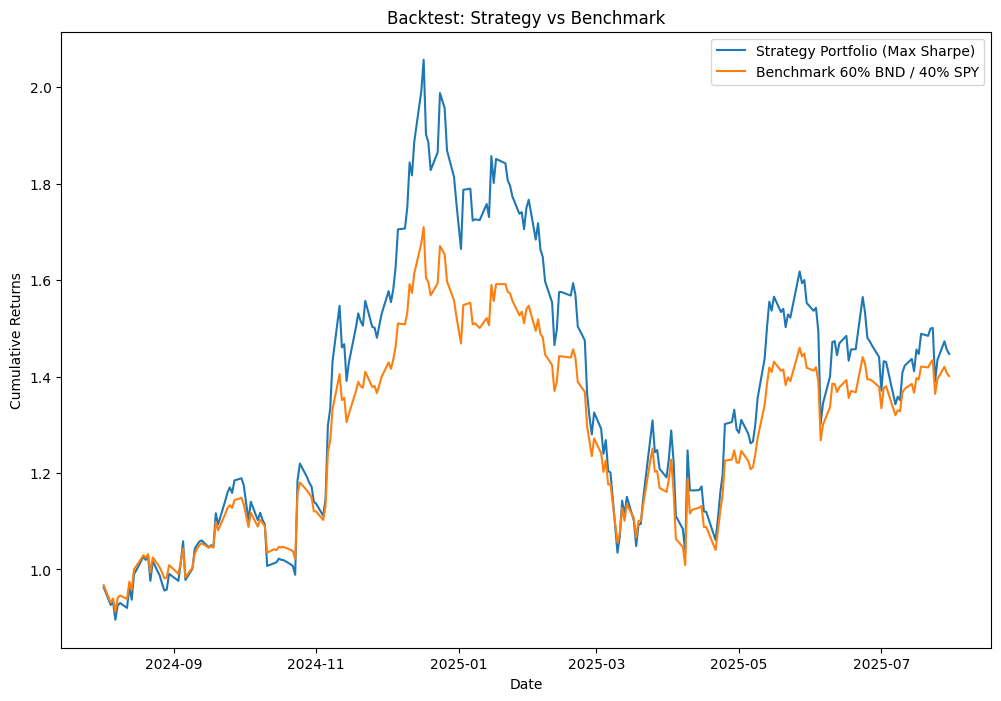

Strategy Total Return: 0.4468
Strategy Sharpe Ratio: 0.8966
Benchmark Total Return: 0.4009
Benchmark Sharpe Ratio: 0.9405


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# -------------------------------
# 1. Load cleaned financial dataset
# -------------------------------
data = pd.read_csv("../data/financial_data_clean.csv", parse_dates=['Date'])
data = data.sort_values('Date')

# -------------------------------
# 2. Filter backtesting period (last 1 year)
# -------------------------------
backtest_start = pd.Timestamp('2024-08-01')
backtest_end = pd.Timestamp('2025-07-31')
data_bt = data[(data['Date'] >= backtest_start) & (data['Date'] <= backtest_end)].copy()

# -------------------------------
# 3. Pivot to have tickers as columns
# -------------------------------
pivot_bt = data_bt.pivot(index='Date', columns='Ticker', values='Close')

# Compute daily returns
returns_bt = pivot_bt.pct_change().dropna()  # columns: TSLA, BND, SPY

# -------------------------------
# 4. Load optimal portfolio weights from Task 4
# -------------------------------
with open("models/opt_max_sharpe_weights.pkl", "rb") as f:
    strategy_weights = pickle.load(f)  # array([TSLA_weight, BND_weight, SPY_weight])

# Ensure order matches pivot columns
strategy_weights = np.array(strategy_weights)[[list(returns_bt.columns).index(t) for t in ['TSLA','BND','SPY']]]

# Benchmark: 60% SPY / 40% BND, TSLA=0
benchmark_weights = np.array([0, 0.4, 0.6])

# -------------------------------
# 5. Compute cumulative returns
# -------------------------------
strategy_cum = (returns_bt.values @ strategy_weights + 1).cumprod()
benchmark_cum = (returns_bt.values @ benchmark_weights + 1).cumprod()

# -------------------------------
# 6. Plot cumulative returns
# -------------------------------
plt.figure(figsize=(12,8))
plt.plot(returns_bt.index, strategy_cum, label='Strategy Portfolio (Max Sharpe)')
plt.plot(returns_bt.index, benchmark_cum, label='Benchmark 60% BND / 40% SPY')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Backtest: Strategy vs Benchmark')
plt.legend()
plt.show()

# -------------------------------
# 7. Performance metrics
# -------------------------------
strategy_total_return = strategy_cum[-1] - 1
benchmark_total_return = benchmark_cum[-1] - 1

strategy_sharpe = (returns_bt.values @ strategy_weights).mean() / (returns_bt.values @ strategy_weights).std() * np.sqrt(252)
benchmark_sharpe = (returns_bt.values @ benchmark_weights).mean() / (returns_bt.values @ benchmark_weights).std() * np.sqrt(252)

print("Strategy Total Return:", round(strategy_total_return,4))
print("Strategy Sharpe Ratio:", round(strategy_sharpe,4))
print("Benchmark Total Return:", round(benchmark_total_return,4))
print("Benchmark Sharpe Ratio:", round(benchmark_sharpe,4))
